In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "/content/drive/MyDrive/241121_Halitosis_data preprocessing.xlsx"

df = pd.read_excel(file_path)


# 평균값으로 채울 컬럼
mean_fill_columns = ['pH', 'BufferCapacity']

# 0으로 채울 컬럼
zero_fill_columns = ['S_Hypertension', 'S_DM', 'S_Hyperlipidemia', 'S_RenalDiseases', 'S_LiverDiseases',
                     'S_Rheumatism', 'S_Osteoporosis', 'S_CVD', 'S_TD', 'S_MentalDisorders', 'S_UrinaryDiseases','S_Asthma']

# 1. 평균값으로 결측치 채우기
for column in mean_fill_columns:
    df[column] = df[column].fillna(df[column].mean())

# 2. 0으로 결측치 채우기
df[zero_fill_columns] = df[zero_fill_columns].fillna(0)

# 3. 빈 값 (공백, NaN 등)을 0으로 채우기
df = df.replace(r'^\s*$', 0, regex=True)  # 공백 값을 0으로 변환
df = df.fillna(0)  # NaN 값을 0으로 변환

columns = df.columns
print(len(columns))
print(columns)
df.count()

#df.to_excel("/content/drive/MyDrive/241121_Halitosis_data preprocessing.xlsx", index=False)

49
Index(['Halitosis_subjective', 'Sex', 'Age', 'Elderly', 'Super_Elderly',
       'Xerostomia_subjective', 'UFR', 'SFR', 'pH', 'BufferCapacity', 'VAS',
       'StickySaliva', 'Oralhygiene', 'Calculus', 'O_Stomatitis', 'O_RAU',
       'O_Candidiasis', 'O_Periodontitis', 'O_LichenPlanus', 'O_Sialodochitis',
       'O_Glossodynia', 'O_BMS', 'S_Hypertension', 'S_DM', 'S_Hyperlipidemia',
       'S_RenalDiseases', 'S_LiverDiseases', 'S_Rheumatism', 'S_Osteoporosis',
       'S_CVD', 'S_TD', 'S_MentalDisorders', 'S_UrinaryDiseases', 'S_Asthma',
       'S_CancerOp', 'NumberofSystmicDiseases', 'M_Hypertension', 'M_DM',
       'M_Osteoporosis', 'M_Hyperlipidemia', 'M_CV', 'M_TD', 'M_GI',
       'M_UrinaryDiseases', 'M_Arthritis', 'M_Rheumatism', 'M_Anxiolytic',
       'M_SleepingPills', 'M_Aspirin'],
      dtype='object')


,0
Halitosis_subjective,821
Sex,821
Age,821
Elderly,821
Super_Elderly,821
Xerostomia_subjective,821
UFR,821
SFR,821
pH,821
BufferCapacity,821


In [ ]:
from scipy.stats import zscore

def count_outliers_by_zscore(df):
    outlier_counts = {}
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        # Z-score 계산
        z_scores = zscore(df[column])

        # Z-score가 ±3을 벗어나는 값의 개수 계산
        outlier_count = (abs(z_scores) > 10).sum()
        outlier_counts[column] = outlier_count

    # 결과 출력
    for col, count in outlier_counts.items():
        print(f"'{col}' 컬럼의 이상치 개수: {count}")

# 함수 사용 예시
count_outliers_by_zscore(df)

'Halitosis_subjective' 컬럼의 이상치 개수: 0
'Sex' 컬럼의 이상치 개수: 0
'Age' 컬럼의 이상치 개수: 0
'Elderly' 컬럼의 이상치 개수: 0
'Super_Elderly' 컬럼의 이상치 개수: 0
'Xerostomia_subjective' 컬럼의 이상치 개수: 0
'UFR' 컬럼의 이상치 개수: 0
'SFR' 컬럼의 이상치 개수: 1
'pH' 컬럼의 이상치 개수: 0
'BufferCapacity' 컬럼의 이상치 개수: 0
'VAS' 컬럼의 이상치 개수: 0
'StickySaliva' 컬럼의 이상치 개수: 0
'Oralhygiene' 컬럼의 이상치 개수: 0
'Calculus' 컬럼의 이상치 개수: 0
'O_Stomatitis' 컬럼의 이상치 개수: 0
'O_RAU' 컬럼의 이상치 개수: 0
'O_Candidiasis' 컬럼의 이상치 개수: 0
'O_Periodontitis' 컬럼의 이상치 개수: 0
'O_LichenPlanus' 컬럼의 이상치 개수: 0
'O_Sialodochitis' 컬럼의 이상치 개수: 6
'O_Glossodynia' 컬럼의 이상치 개수: 0
'O_BMS' 컬럼의 이상치 개수: 0
'S_Hypertension' 컬럼의 이상치 개수: 0
'S_DM' 컬럼의 이상치 개수: 0
'S_Hyperlipidemia' 컬럼의 이상치 개수: 0
'S_RenalDiseases' 컬럼의 이상치 개수: 0
'S_LiverDiseases' 컬럼의 이상치 개수: 0
'S_Rheumatism' 컬럼의 이상치 개수: 0
'S_Osteoporosis' 컬럼의 이상치 개수: 0
'S_CVD' 컬럼의 이상치 개수: 0
'S_TD' 컬럼의 이상치 개수: 0
'S_MentalDisorders' 컬럼의 이상치 개수: 0
'S_UrinaryDiseases' 컬럼의 이상치 개수: 0
'S_Asthma' 컬럼의 이상치 개수: 0
'S_CancerOp' 컬럼의 이상치 개수: 0
'NumberofSystmicDiseases' 컬럼의 이상치 개수: 0

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:40:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Results:
Accuracy: 0.8255
ROC-AUC: 0.9035
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       143
           1       0.80      0.86      0.82       132

    accuracy                           0.83       275
   macro avg       0.83      0.83      0.83       275
weighted avg       0.83      0.83      0.83       275



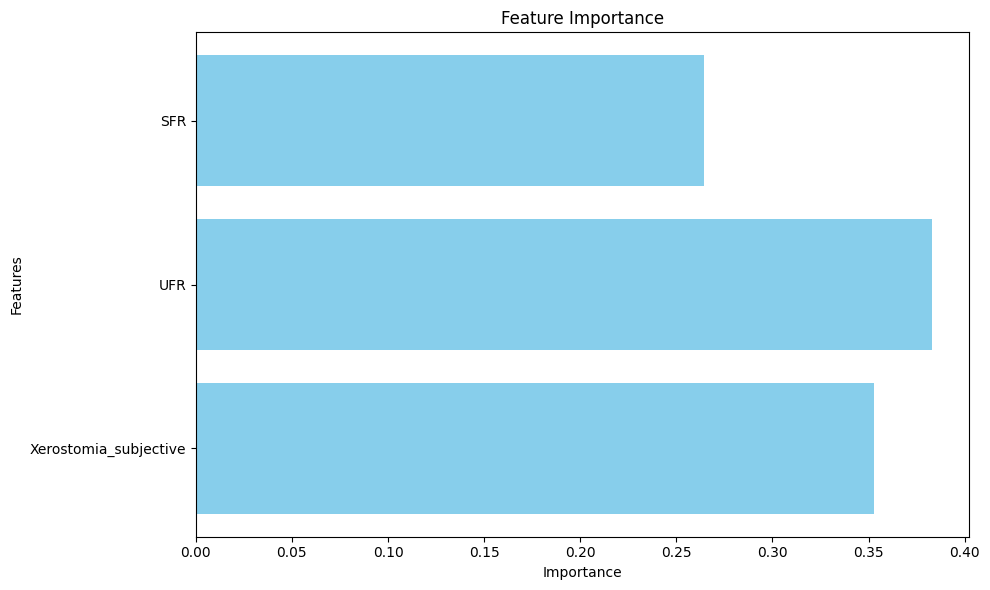

                 Feature  Importance
0                    UFR    0.383071
1  Xerostomia_subjective    0.352704
2                    SFR    0.264225


In [3]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay

# 1. 데이터 준비
X = df[['Xerostomia_subjective','UFR', 'SFR']]  # F, G, H열
y = df['Halitosis_subjective']  # A열

# 2. SMOTE 적용
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 학습/검증 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 3. XGBoost 모델
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_pred_prob = xgb_model.predict_proba(X_test)[:, 1]

# 4. 성능 평가
# XGBoost
print("\nXGBoost Results:")
print(f"Accuracy: {accuracy_score(y_test, xgb_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, xgb_pred_prob):.4f}")
print(classification_report(y_test, xgb_pred))

# Feature Importance
importance = xgb_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importance, color='skyblue')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# Feature Importance 수치로 표현
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Feature Importance 출력
importance_df.reset_index(drop=True, inplace=True)
print(importance_df)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:58:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8618
ROC-AUC: 0.9417
              precision    recall  f1-score   support

           0       0.91      0.82      0.86       143
           1       0.82      0.91      0.86       132

    accuracy                           0.86       275
   macro avg       0.86      0.86      0.86       275
weighted avg       0.87      0.86      0.86       275



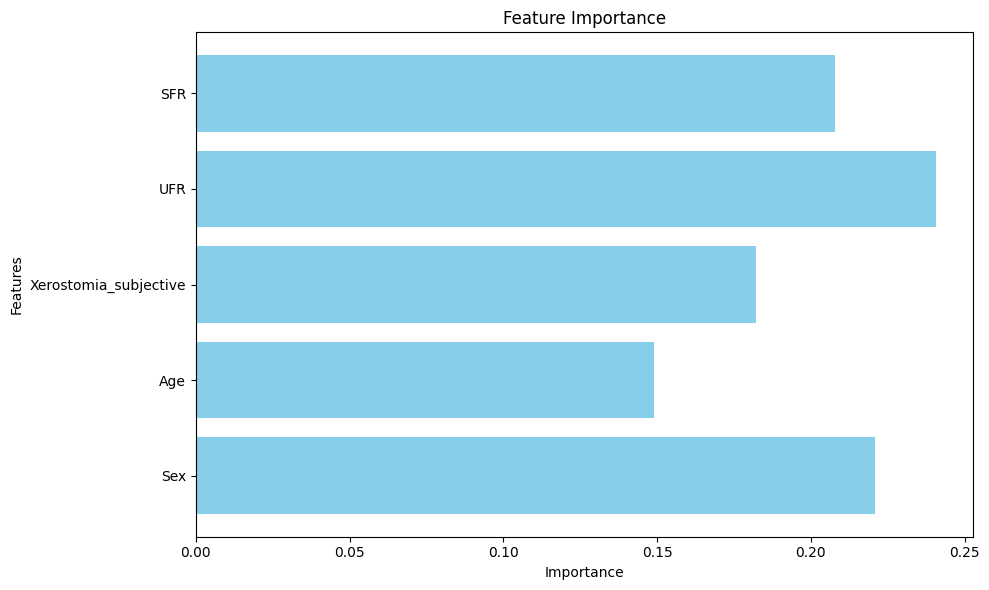


Feature Importance:
                 Feature  Importance
3                    UFR    0.240592
0                    Sex    0.220727
4                    SFR    0.207802
2  Xerostomia_subjective    0.182027
1                    Age    0.148852


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import pandas as pd
import matplotlib.pyplot as plt

# 1. 데이터 준비
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])  # 성별 인코딩
X = df[['Sex', 'Age', 'Xerostomia_subjective', 'UFR', 'SFR']]  # B, C, F, G, H열
y = df['Halitosis_subjective']  # A열

# 2. SMOTE로 데이터 증강
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 3. 학습/검증 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 4. XGBoost 모델 학습
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# 5. 예측 및 평가
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(classification_report(y_test, y_pred))

# Feature Importance
importance = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importance, color='skyblue')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# 6. Feature Importance 계산 및 출력
features = X.columns  # 컬럼 이름 가져오기
importance = model.feature_importances_  # XGBoost의 Feature Importance 가져오기

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Feature Importance 출력
print("\nFeature Importance:")
print(importance_df)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:43:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8909
ROC-AUC: 0.9669
              precision    recall  f1-score   support

           0       0.94      0.85      0.89       143
           1       0.85      0.94      0.89       132

    accuracy                           0.89       275
   macro avg       0.89      0.89      0.89       275
weighted avg       0.90      0.89      0.89       275



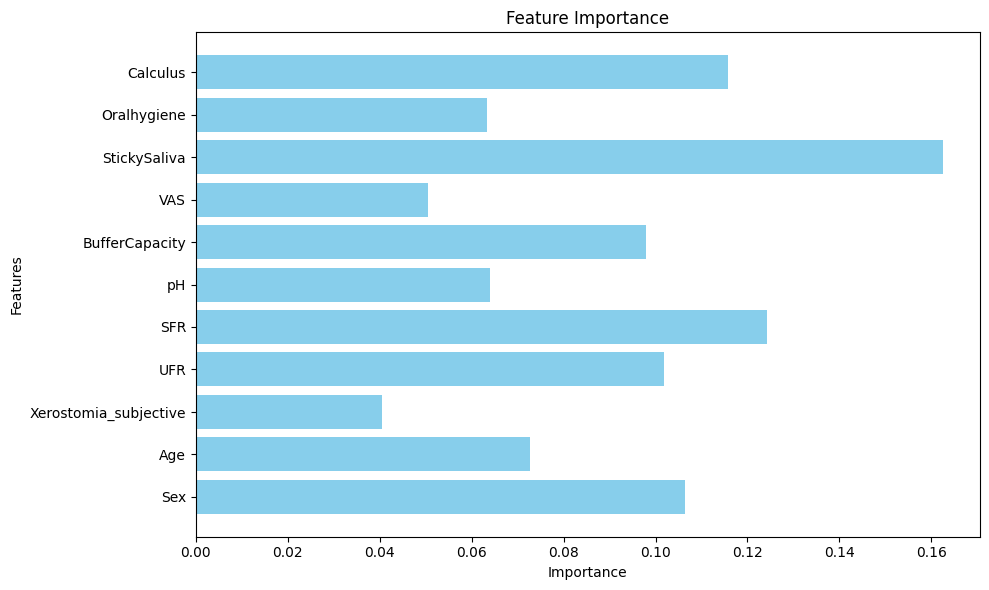

                  Feature  Importance
0            StickySaliva    0.162448
1                     SFR    0.124315
2                Calculus    0.115710
3                     Sex    0.106331
4                     UFR    0.101933
5          BufferCapacity    0.097971
6                     Age    0.072793
7                      pH    0.063930
8             Oralhygiene    0.063397
9                     VAS    0.050597
10  Xerostomia_subjective    0.040575


In [ ]:
# 1. 데이터 준비
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])  # 성별 인코딩
X = df[['Sex', 'Age', 'Xerostomia_subjective', 'UFR', 'SFR', 'pH', 'BufferCapacity', 'VAS', 'StickySaliva', 'Oralhygiene', 'Calculus']]  # B, C, F, G, H, I-N열 추가
y = df['Halitosis_subjective']  # A열

# 2. SMOTE로 데이터 증강
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 3. 학습/검증 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 4. XGBoost 모델 학습
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# 5. 예측 및 평가
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# 6. 성능 평가
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(classification_report(y_test, y_pred))

# Feature Importance
importance = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importance, color='skyblue')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# Feature Importance 수치로 표현
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Feature Importance 출력
importance_df.reset_index(drop=True, inplace=True)
print(importance_df)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:43:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8691
ROC-AUC: 0.9434
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       143
           1       0.83      0.91      0.87       132

    accuracy                           0.87       275
   macro avg       0.87      0.87      0.87       275
weighted avg       0.87      0.87      0.87       275



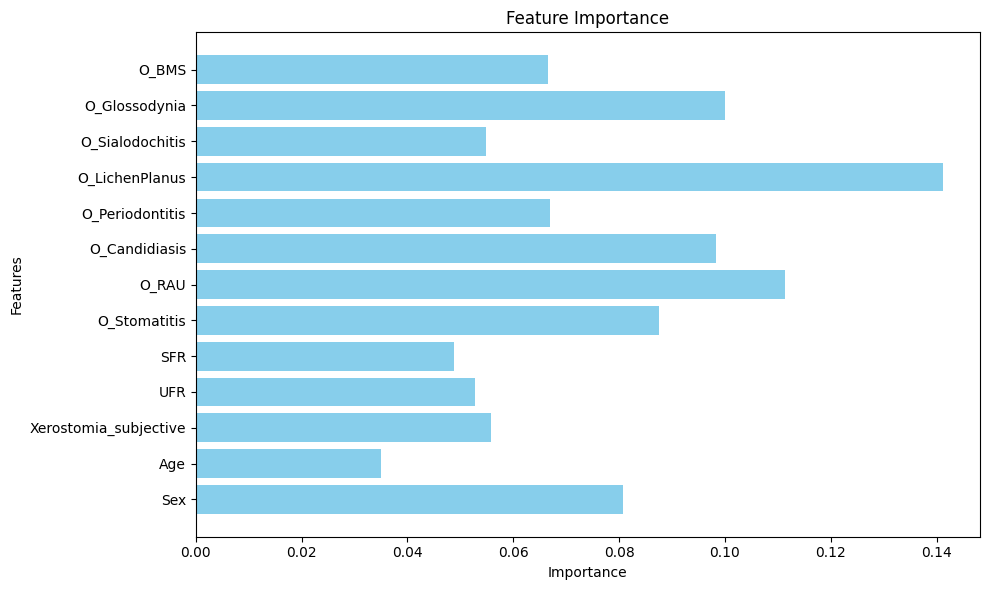

                  Feature  Importance
0          O_LichenPlanus    0.141135
1                   O_RAU    0.111271
2           O_Glossodynia    0.100063
3           O_Candidiasis    0.098309
4            O_Stomatitis    0.087566
5                     Sex    0.080757
6         O_Periodontitis    0.066966
7                   O_BMS    0.066527
8   Xerostomia_subjective    0.055854
9         O_Sialodochitis    0.054924
10                    UFR    0.052770
11                    SFR    0.048802
12                    Age    0.035056


In [ ]:
# 1. 데이터 준비
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])  # 성별 인코딩
# 기존 B, C, F, G, H + O-V열 추가
X = df[['Sex', 'Age', 'Xerostomia_subjective', 'UFR', 'SFR',
        'O_Stomatitis', 'O_RAU', 'O_Candidiasis', 'O_Periodontitis', 'O_LichenPlanus', 'O_Sialodochitis',
        'O_Glossodynia', 'O_BMS']]  # 열 리스트 수정
y = df['Halitosis_subjective']  # A열 (타겟 변수)

# 2. SMOTE로 데이터 증강
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 3. 학습/검증 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 4. XGBoost 모델 학습
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# 5. 예측 및 평가
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# 6. 성능 평가
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(classification_report(y_test, y_pred))

importance = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importance, color='skyblue')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# Feature Importance 수치로 표현
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Feature Importance 출력
importance_df.reset_index(drop=True, inplace=True)
print(importance_df)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:40:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8727
ROC-AUC: 0.9344
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       143
           1       0.84      0.91      0.87       132

    accuracy                           0.87       275
   macro avg       0.87      0.87      0.87       275
weighted avg       0.88      0.87      0.87       275



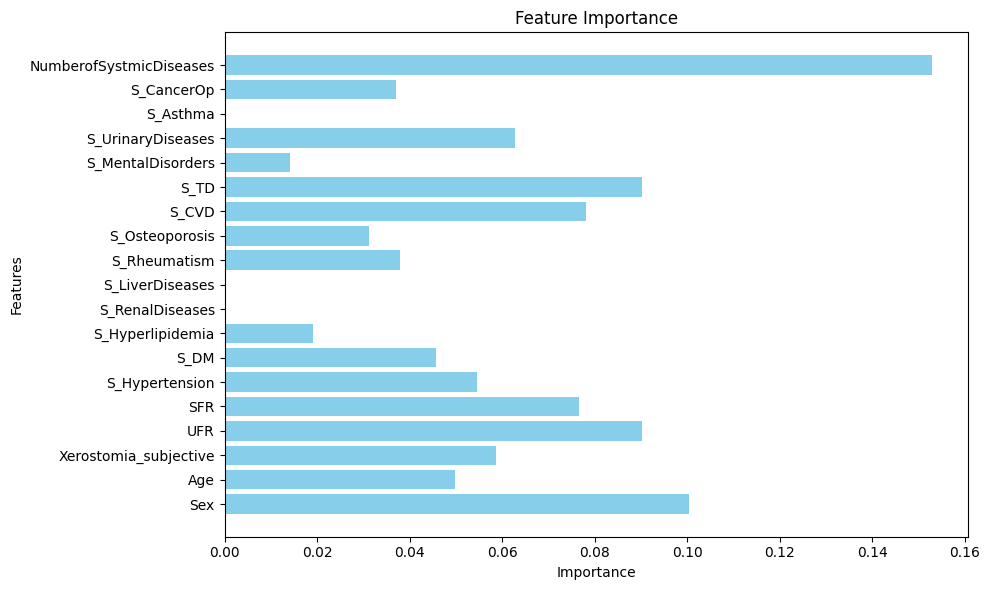

                    Feature  Importance
0   NumberofSystmicDiseases    0.152995
1                       Sex    0.100449
2                       UFR    0.090299
3                      S_TD    0.090206
4                     S_CVD    0.078221
5                       SFR    0.076673
6         S_UrinaryDiseases    0.062878
7     Xerostomia_subjective    0.058637
8            S_Hypertension    0.054494
9                       Age    0.049746
10                     S_DM    0.045782
11             S_Rheumatism    0.038021
12               S_CancerOp    0.037115
13           S_Osteoporosis    0.031218
14         S_Hyperlipidemia    0.019159
15        S_MentalDisorders    0.014108
16          S_RenalDiseases    0.000000
17                 S_Asthma    0.000000
18          S_LiverDiseases    0.000000


In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import pandas as pd
import matplotlib.pyplot as plt

# 1. 데이터 준비
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])  # 성별 인코딩
# 기존 변수(B, C, F, G, H + W-AJ열 추가
X = df[['Sex', 'Age', 'Xerostomia_subjective', 'UFR', 'SFR',
        'S_Hypertension', 'S_DM', 'S_Hyperlipidemia',
        'S_RenalDiseases', 'S_LiverDiseases', 'S_Rheumatism', 'S_Osteoporosis',
        'S_CVD', 'S_TD', 'S_MentalDisorders', 'S_UrinaryDiseases', 'S_Asthma',
        'S_CancerOp', 'NumberofSystmicDiseases']]  # W~AJ 열 추가
y = df['Halitosis_subjective']  # A열 (타겟 변수)

# 2. SMOTE로 데이터 증강
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 3. 학습/검증 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 4. XGBoost 모델 학습
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# 5. 예측 및 평가
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# 6. 성능 평가
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(classification_report(y_test, y_pred))

importance = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importance, color='skyblue')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# Feature Importance 수치로 표현
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Feature Importance 출력
importance_df.reset_index(drop=True, inplace=True)
print(importance_df)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:43:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8618
ROC-AUC: 0.9374
              precision    recall  f1-score   support

           0       0.92      0.80      0.86       143
           1       0.81      0.92      0.87       132

    accuracy                           0.86       275
   macro avg       0.87      0.86      0.86       275
weighted avg       0.87      0.86      0.86       275



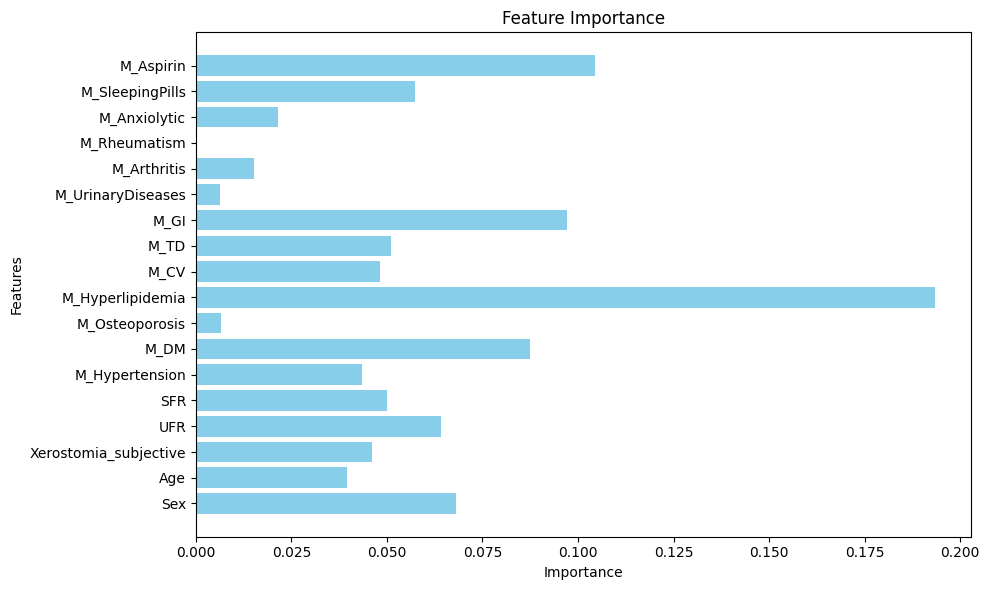

                  Feature  Importance
0        M_Hyperlipidemia    0.193261
1               M_Aspirin    0.104331
2                    M_GI    0.096985
3                    M_DM    0.087559
4                     Sex    0.067962
5                     UFR    0.064079
6         M_SleepingPills    0.057289
7                    M_TD    0.051201
8                     SFR    0.050144
9                    M_CV    0.048160
10  Xerostomia_subjective    0.046164
11         M_Hypertension    0.043592
12                    Age    0.039645
13           M_Anxiolytic    0.021414
14            M_Arthritis    0.015173
15         M_Osteoporosis    0.006624
16      M_UrinaryDiseases    0.006417
17           M_Rheumatism    0.000000


In [ ]:
# 1. 데이터 준비
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])  # 성별 인코딩
# 기존 변수(B, C, F, G, H + AK-AW 열 추가)
X = df[['Sex', 'Age', 'Xerostomia_subjective', 'UFR', 'SFR',
        'M_Hypertension', 'M_DM',
        'M_Osteoporosis', 'M_Hyperlipidemia', 'M_CV', 'M_TD', 'M_GI',
        'M_UrinaryDiseases', 'M_Arthritis', 'M_Rheumatism', 'M_Anxiolytic',
        'M_SleepingPills', 'M_Aspirin']]  # AK-AW 열 추가
y = df['Halitosis_subjective']  # A열 (타겟 변수)

# 2. SMOTE로 데이터 증강
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 3. 학습/검증 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 4. XGBoost 모델 학습
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# 5. 예측 및 평가
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# 6. 성능 평가
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(classification_report(y_test, y_pred))

importance = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importance, color='skyblue')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# Feature Importance 수치로 표현
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Feature Importance 출력
importance_df.reset_index(drop=True, inplace=True)
print(importance_df)



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:43:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8764
ROC-AUC: 0.9498
              precision    recall  f1-score   support

           0       0.90      0.85      0.88       143
           1       0.85      0.90      0.88       132

    accuracy                           0.88       275
   macro avg       0.88      0.88      0.88       275
weighted avg       0.88      0.88      0.88       275



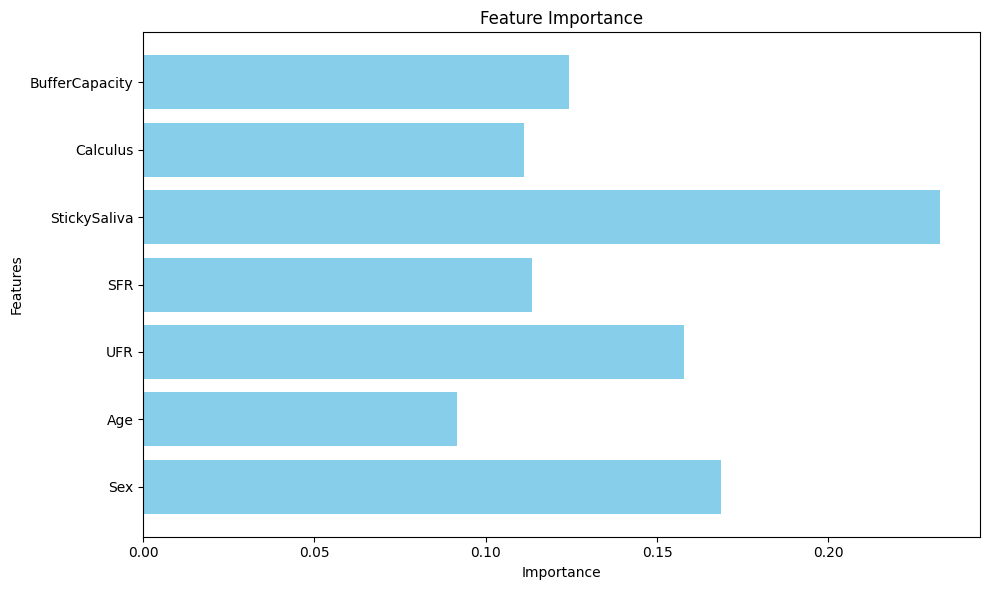

          Feature  Importance
0    StickySaliva    0.232605
1             Sex    0.168546
2             UFR    0.157910
3  BufferCapacity    0.124447
4             SFR    0.113517
5        Calculus    0.111250
6             Age    0.091726


In [ ]:
# 1. 데이터 준비
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])  # 성별 인코딩
# 추천 조합 변수 #1
# StickySaliva와 SFR이 첫 번째 구성에서 높은 중요도를 가짐. 구취와 직접적인 연관성이 높아 보이는 Feature
X = df[['Sex', 'Age', 'UFR', 'SFR', 'StickySaliva', 'Calculus',
        'BufferCapacity']]
y = df['Halitosis_subjective']  # A열 (타겟 변수)

# 2. SMOTE로 데이터 증강
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 3. 학습/검증 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 4. XGBoost 모델 학습
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# 5. 예측 및 평가
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# 6. 성능 평가
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(classification_report(y_test, y_pred))

importance = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importance, color='skyblue')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# Feature Importance 수치로 표현
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Feature Importance 출력
importance_df.reset_index(drop=True, inplace=True)
print(importance_df)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:43:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8545
ROC-AUC: 0.9420
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       143
           1       0.82      0.89      0.85       132

    accuracy                           0.85       275
   macro avg       0.86      0.86      0.85       275
weighted avg       0.86      0.85      0.85       275



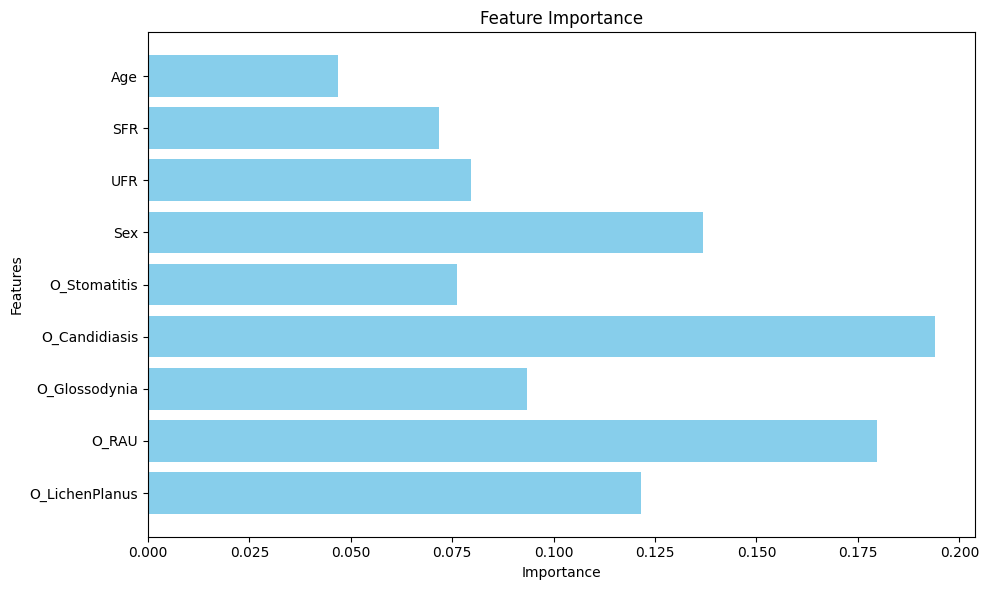

          Feature  Importance
0   O_Candidiasis    0.194120
1           O_RAU    0.179799
2             Sex    0.136775
3  O_LichenPlanus    0.121592
4   O_Glossodynia    0.093405
5             UFR    0.079625
6    O_Stomatitis    0.076122
7             SFR    0.071737
8             Age    0.046826


In [ ]:
# 1. 데이터 준비
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])  # 성별 인코딩
# 추천 조합 변수 #2
# 치과 및 구강 관련 질병(O_LichenPlanus 등)의 중요도가 높게 나타남.
X = df[['O_LichenPlanus', 'O_RAU', 'O_Glossodynia', 'O_Candidiasis',
        'O_Stomatitis', 'Sex', 'UFR', 'SFR', 'Age']]
y = df['Halitosis_subjective']  # A열 (타겟 변수)

# 2. SMOTE로 데이터 증강
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 3. 학습/검증 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 4. XGBoost 모델 학습
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# 5. 예측 및 평가
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# 6. 성능 평가
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(classification_report(y_test, y_pred))

importance = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importance, color='skyblue')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# Feature Importance 수치로 표현
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Feature Importance 출력
importance_df.reset_index(drop=True, inplace=True)
print(importance_df)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:43:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8691
ROC-AUC: 0.9446
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       143
           1       0.83      0.91      0.87       132

    accuracy                           0.87       275
   macro avg       0.87      0.87      0.87       275
weighted avg       0.87      0.87      0.87       275



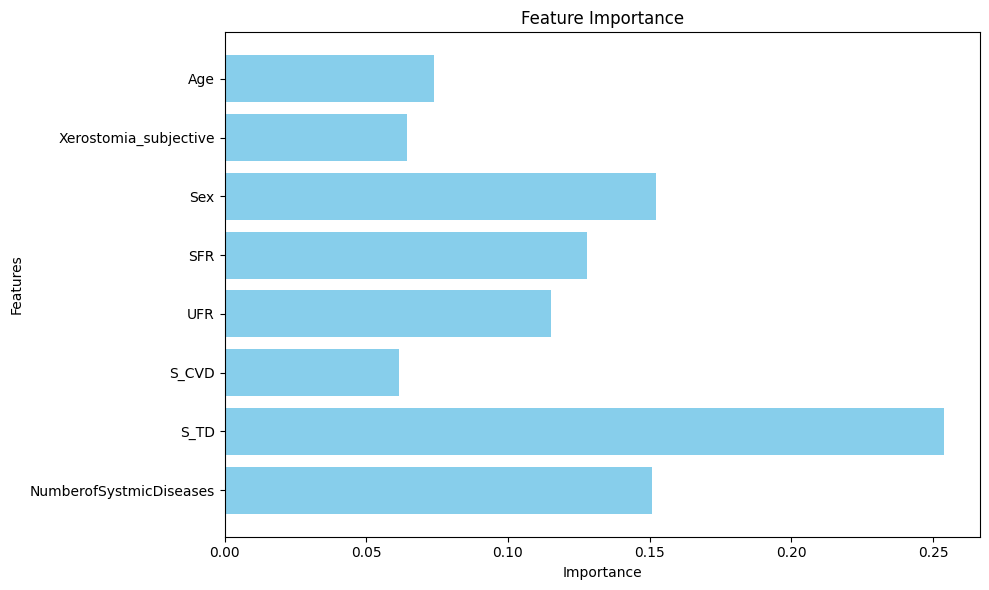

                   Feature  Importance
0                     S_TD    0.253878
1                      Sex    0.152364
2  NumberofSystmicDiseases    0.150754
3                      SFR    0.127852
4                      UFR    0.115186
5                      Age    0.074008
6    Xerostomia_subjective    0.064501
7                    S_CVD    0.061456


In [ ]:
# 1. 데이터 준비
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])  # 성별 인코딩
# 추천 조합 변수 #3
# 전신질환과 구취 간의 연관성을 확인할 수 있는 구성. NumberofSystmicDiseases가 가장 높은 중요도를 가짐.
X = df[['NumberofSystmicDiseases', 'S_TD', 'S_CVD', 'UFR', 'SFR',
        'Sex', 'Xerostomia_subjective', 'Age']]
y = df['Halitosis_subjective']  # A열 (타겟 변수)

# 2. SMOTE로 데이터 증강
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 3. 학습/검증 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 4. XGBoost 모델 학습
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# 5. 예측 및 평가
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# 6. 성능 평가
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(classification_report(y_test, y_pred))

importance = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importance, color='skyblue')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# Feature Importance 수치로 표현
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Feature Importance 출력
importance_df.reset_index(drop=True, inplace=True)
print(importance_df)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:36:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8836
ROC-AUC: 0.9507
              precision    recall  f1-score   support

           0       0.93      0.84      0.88       143
           1       0.84      0.93      0.88       132

    accuracy                           0.88       275
   macro avg       0.89      0.89      0.88       275
weighted avg       0.89      0.88      0.88       275



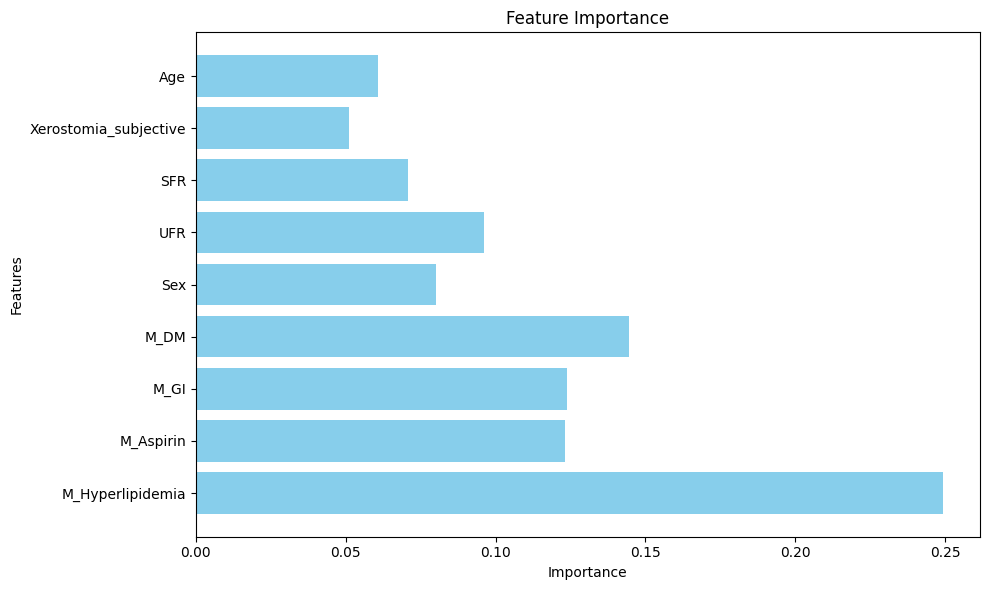

                 Feature  Importance
0       M_Hyperlipidemia    0.249121
1                   M_DM    0.144500
2                   M_GI    0.123933
3              M_Aspirin    0.123300
4                    UFR    0.096158
5                    Sex    0.080117
6                    SFR    0.070776
7                    Age    0.060852
8  Xerostomia_subjective    0.051244


In [ ]:
# 1. 데이터 준비
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])  # 성별 인코딩
# 추천 조합 변수 #4
# 약물 사용과 관련된 Feature가 중요한 영향을 미칠 가능성이 높은 구성.
X = df[['M_Hyperlipidemia', 'M_Aspirin', 'M_GI', 'M_DM', 'Sex',
        'UFR', 'SFR', 'Xerostomia_subjective', 'Age']]
y = df['Halitosis_subjective']  # A열 (타겟 변수)

# 2. SMOTE로 데이터 증강
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 3. 학습/검증 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 4. XGBoost 모델 학습
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# 5. 예측 및 평가
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# 6. 성능 평가
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(classification_report(y_test, y_pred))

importance = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importance, color='skyblue')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# Feature Importance 수치로 표현
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Feature Importance 출력
importance_df.reset_index(drop=True, inplace=True)
print(importance_df)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:43:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8764
ROC-AUC: 0.9545
              precision    recall  f1-score   support

           0       0.90      0.85      0.88       143
           1       0.85      0.90      0.88       132

    accuracy                           0.88       275
   macro avg       0.88      0.88      0.88       275
weighted avg       0.88      0.88      0.88       275



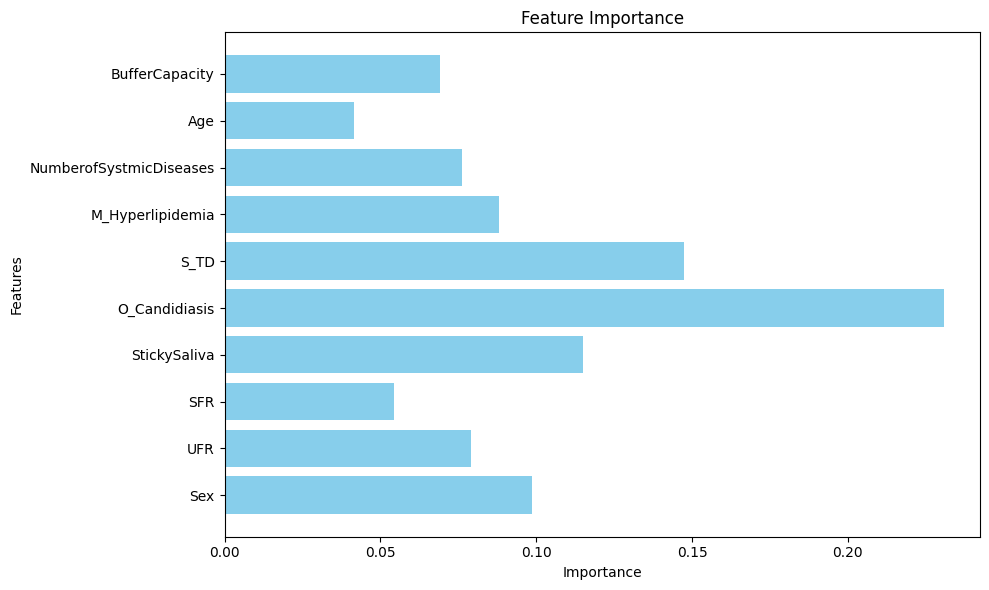

                   Feature  Importance
0            O_Candidiasis    0.230858
1                     S_TD    0.147423
2             StickySaliva    0.114874
3                      Sex    0.098547
4         M_Hyperlipidemia    0.087907
5                      UFR    0.079236
6  NumberofSystmicDiseases    0.076127
7           BufferCapacity    0.069081
8                      SFR    0.054289
9                      Age    0.041659


In [ ]:
# 1. 데이터 준비
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])  # 성별 인코딩
# 추천 조합 변수 #5
# 수치 기반 최적 조합 (전체 중요도 평균 고려)
X = df[['Sex', 'UFR', 'SFR', 'StickySaliva', 'O_Candidiasis',
        'S_TD', 'M_Hyperlipidemia', 'NumberofSystmicDiseases',
        'Age', 'BufferCapacity']]
y = df['Halitosis_subjective']  # A열 (타겟 변수)

# 2. SMOTE로 데이터 증강
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 3. 학습/검증 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 4. XGBoost 모델 학습
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# 5. 예측 및 평가
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# 6. 성능 평가
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(classification_report(y_test, y_pred))

importance = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importance, color='skyblue')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# Feature Importance 수치로 표현
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Feature Importance 출력
importance_df.reset_index(drop=True, inplace=True)
print(importance_df)

In [ ]:
# 1. 수정된 Feature 조합
# 자체 조합
selected_features = ['Sex', 'Age', 'StickySaliva', 'UFR', 'SFR', 'O_Candidiasis', 'S_TD',
                     'M_Hyperlipidemia', 'NumberofSystmicDiseases', 'BufferCapacity']

# 2. 데이터 준비
X_selected = df[selected_features]
y = df['Halitosis_subjective']

# SMOTE 적용
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)

# 학습/검증 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 3. XGBoost 모델 학습 (Hyperparameter Tuning 포함)
model = XGBClassifier(
    eval_metric='logloss',
    random_state=42,
    max_depth=5,         # 트리의 최대 깊이
    learning_rate=0.1,   # 학습률
    n_estimators=150,    # 부스팅 단계 수
    subsample=0.8        # 샘플링 비율
)
model.fit(X_train, y_train)

# 4. 예측 및 평가
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9018
ROC-AUC: 0.9539
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       143
           1       0.88      0.92      0.90       132

    accuracy                           0.90       275
   macro avg       0.90      0.90      0.90       275
weighted avg       0.90      0.90      0.90       275



In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# 1. 데이터 준비
selected_features = ['Sex', 'Age', 'StickySaliva', 'UFR', 'SFR', 'O_Candidiasis', 'S_TD',
                     'M_Hyperlipidemia', 'NumberofSystmicDiseases', 'BufferCapacity']
X_selected = df[selected_features]
y = df['Halitosis_subjective']

# SMOTE 적용
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)

# 학습/검증 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 2. Hyperparameter Tuning
param_grid = {
    'max_depth': [4, 5, 6],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [150, 200, 250],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

grid_search = GridSearchCV(
    XGBClassifier(eval_metric='logloss', random_state=42),
    param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1
)

grid_search.fit(X_train, y_train)

# 최적 파라미터 확인
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# 3. 최적 모델 학습
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# 4. 평가
y_pred = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(classification_report(y_test, y_pred))

from sklearn.metrics import roc_curve

# Validation Set에서 확률 예측
y_val_pred_prob = best_model.predict_proba(X_train)[:, 1]  # Training 데이터에서 Cross-Validation 사용 가능
fpr, tpr, thresholds = roc_curve(y_train, y_val_pred_prob)
youden_index = tpr - fpr
optimal_idx = youden_index.argmax()
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold:.4f}")

# Test Set에서 Threshold 적용
y_test_pred_prob = best_model.predict_proba(X_test)[:, 1]
y_test_pred_threshold = (y_test_pred_prob >= optimal_threshold).astype(int)

# 평가
accuracy = accuracy_score(y_test, y_test_pred_threshold)
roc_auc = roc_auc_score(y_test, y_test_pred_prob)
print(f"Accuracy with Threshold: {accuracy:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(classification_report(y_test, y_test_pred_threshold))

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.8}
Accuracy: 0.8764
ROC-AUC: 0.9512
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       143
           1       0.84      0.92      0.88       132

    accuracy                           0.88       275
   macro avg       0.88      0.88      0.88       275
weighted avg       0.88      0.88      0.88       275

Optimal Threshold: 0.4504
Accuracy with Threshold: 0.8691
ROC-AUC: 0.9512
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       143
           1       0.83      0.92      0.87       132

    accuracy                           0.87       275
   macro avg       0.87      0.87      0.87       275
weighted avg       0.87      0.87      0.87       275



In [ ]:
import joblib

# 모델 저장
joblib.dump(model, 'halitosis_model.pkl')

['halitosis_model.pkl']

In [ ]:
# 모델 로드
loaded_model = joblib.load('halitosis_model.pkl')

# 외부 입력 데이터 예시
input_data = {
    'Sex': 1,                # Female
    'Age': 30,
    'StickySaliva': 1,
    'UFR': 0.3,
    'SFR': 0.5,
    'O_Candidiasis': 1,
    'S_TD': 0,
    'M_Hyperlipidemia': 0,
    'NumberofSystmicDiseases': 1,
    'BufferCapacity': 12,



    # 필요한 Feature 모두 포함
}

# 입력 데이터를 DataFrame으로 변환
import pandas as pd
input_df = pd.DataFrame([input_data])

# 예측 수행
predicted_prob = loaded_model.predict_proba(input_df)[:, 1]  # 구취 확률
predicted_label = loaded_model.predict(input_df)  # 구취 여부

# 출력
print(f"구취 확률: {predicted_prob[0]*100:.2f}%")
print(f"예측: {'구취 있음' if predicted_label[0] == 1 else '구취 없음'}")

구취 확률: 29.44%
예측: 구취 없음


In [ ]:
# 간단한 CLI 예제
input_data = {}
input_data['Sex'] = int(input("성별 (0: 남성, 1: 여성): "))
input_data['Age'] = int(input("나이: "))
input_data['StickySaliva'] = int(input("침 끈적임 (0: 없음, 1: 있음): "))
input_data['UFR'] = float(input("비자극 타액 분비율 (UFR): "))
input_data['SFR'] = float(input("자극 타액 분비율 (SFR): "))
input_data['O_Candidiasis'] = int(input("구강 칸디다증 (0: 없음, 1: 있음): "))
input_data['S_TD'] = int(input("타액선 질환 (0: 없음, 1: 있음): "))
input_data['M_Hyperlipidemia'] = int(input("고지혈증 병력 (0: 없음, 1: 있음): "))
input_data['NumberofSystmicDiseases'] = int(input("전신질환 개수: "))
input_data['BufferCapacity'] = float(input("구강 완충능력 (숫자 입력): "))

input_df = pd.DataFrame([input_data])
predicted_prob = loaded_model.predict_proba(input_df)[:, 1]
predicted_label = loaded_model.predict(input_df)

print(f"구취 확률: {predicted_prob[0]*100:.2f}%")
print(f"예측: {'구취 있음' if predicted_label[0] == 1 else '구취 없음'}")

성별 (0: 남성, 1: 여성): 1
나이: 30
침 끈적임 (0: 없음, 1: 있음): 1
비자극 타액 분비율 (UFR): 0.3
자극 타액 분비율 (SFR): 0.5
구강 칸디다증 (0: 없음, 1: 있음): 1
타액선 질환 (0: 없음, 1: 있음): 0
고지혈증 병력 (0: 없음, 1: 있음): 0
전신질환 개수: 1
구강 완충능력 (숫자 입력): 12
구취 확률: 29.44%
예측: 구취 없음


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# 데이터 준비
X = df[['O_Candidiasis', 'S_TD', 'StickySaliva', 'Sex', 'M_Hyperlipidemia', 'UFR',
        'NumberofSystmicDiseases', 'BufferCapacity', 'SFR', 'Age']].to_numpy()
y = df['Halitosis_subjective'].to_numpy()

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE로 데이터 불균형 해결
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Tensor 변환
X_tensor = torch.tensor(X_train_resampled, dtype=torch.float32)
y_tensor = torch.tensor(y_train_resampled, dtype=torch.long)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# DataLoader
train_dataset = TensorDataset(X_tensor, y_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=32)

# Transformer 모델 정의
class TransformerForTabular(nn.Module):
    def __init__(self, input_dim, num_classes, num_heads, num_layers, dropout=0.1):
        super(TransformerForTabular, self).__init__()
        self.embedding = nn.Linear(input_dim, input_dim)
        self.transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=input_dim, nhead=num_heads, dropout=dropout),
            num_layers=num_layers
        )
        self.fc = nn.Linear(input_dim, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        x = x.unsqueeze(1)  # (batch_size, seq_len, input_dim)
        x = self.transformer(x)
        x = x.mean(dim=1)  # Global average pooling
        x = self.fc(x)
        return x

# 모델 초기화
input_dim = X_train_resampled.shape[1]
num_classes = 2
model = TransformerForTabular(input_dim=input_dim, num_classes=num_classes, num_heads=2, num_layers=2)

# 손실 함수와 옵티마이저
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# 학습 루프
for epoch in range(10):
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        output = model(X_batch)
        loss = criterion(output, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_loader):.4f}")

# 평가
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        output = model(X_batch)
        predictions = torch.argmax(output, dim=1)
        correct += (predictions == y_batch).sum().item()
        total += y_batch.size(0)

accuracy = correct / total
print(f"Test Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 1, Loss: 0.7046
Epoch 2, Loss: 0.6849
Epoch 3, Loss: 0.6805
Epoch 4, Loss: 0.6892
Epoch 5, Loss: 0.6888
Epoch 6, Loss: 0.6905
Epoch 7, Loss: 0.6873
Epoch 8, Loss: 0.6776
Epoch 9, Loss: 0.6886
Epoch 10, Loss: 0.6745
Test Accuracy: 0.7939


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

# 1. 데이터 준비
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])  # 성별 인코딩
X = df[['Sex', 'Age', 'Xerostomia_subjective', 'UFR', 'SFR', 'pH', 'BufferCapacity', 'VAS', 'StickySaliva', 'Oralhygiene', 'Calculus']]  # B, C, F, G, H, I-N열 추가
y = df['Halitosis_subjective']  # A열

# 2. SMOTE로 데이터 증강
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 3. 학습/검증 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 4. XGBoost 모델 학습 (Hyperparameter Tuning 포함)
model = XGBClassifier(
    eval_metric='logloss',
    random_state=42,
    max_depth=8,         # 트리의 최대 깊이
    learning_rate=0.2,   # 학습률
    n_estimators=150,    # 부스팅 단계 수
    subsample=0.9        # 샘플링 비율
)
model.fit(X_train, y_train)

# 5. 예측 및 평가
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# 6. 성능 평가
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9018
ROC-AUC: 0.9663
              precision    recall  f1-score   support

           0       0.95      0.86      0.90       143
           1       0.86      0.95      0.90       132

    accuracy                           0.90       275
   macro avg       0.90      0.90      0.90       275
weighted avg       0.91      0.90      0.90       275



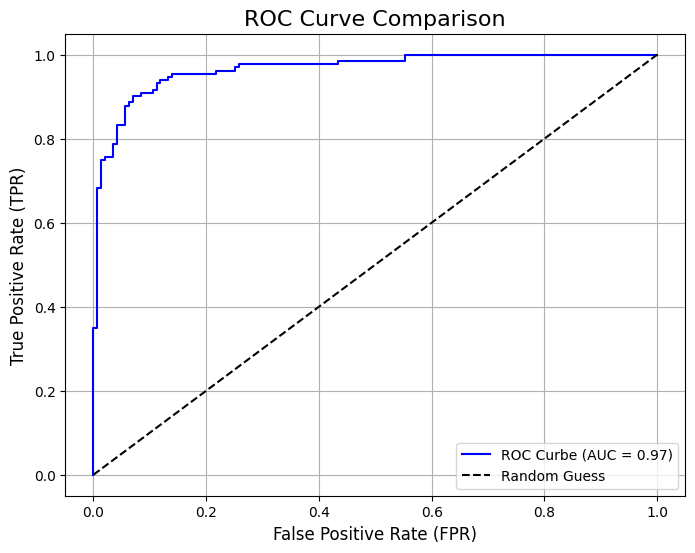

In [ ]:
# XGBoost ROC Curve
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, y_pred_prob)
xgb_auc = auc(xgb_fpr, xgb_tpr)

# Plot ROC Curves
plt.figure(figsize=(8, 6))

plt.plot(xgb_fpr, xgb_tpr, label=f"ROC Curbe (AUC = {xgb_auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve Comparison", fontsize=16)
plt.xlabel("False Positive Rate (FPR)", fontsize=12)
plt.ylabel("True Positive Rate (TPR)", fontsize=12)
plt.legend(loc="lower right")
plt.grid()
plt.show()

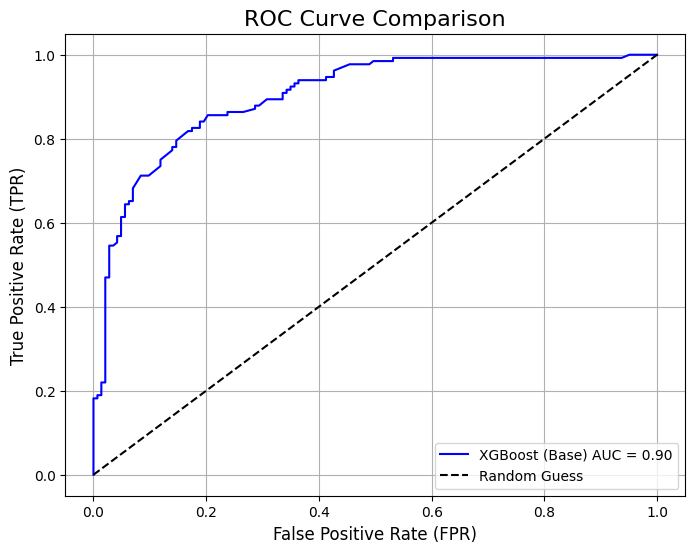

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 기존 XGBoost 모델 ROC Curve
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_pred_prob)
xgb_auc = auc(xgb_fpr, xgb_tpr)

# 초기 그래프 설정
plt.figure(figsize=(8, 6))
plt.plot(xgb_fpr, xgb_tpr, label=f"XGBoost (Base) AUC = {xgb_auc:.2f}", color="blue")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

# 그래프 꾸미기
plt.title("ROC Curve Comparison", fontsize=16)
plt.xlabel("False Positive Rate (FPR)", fontsize=12)
plt.ylabel("True Positive Rate (TPR)", fontsize=12)
plt.legend(loc="lower right")
plt.grid()
plt.show()



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:33:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


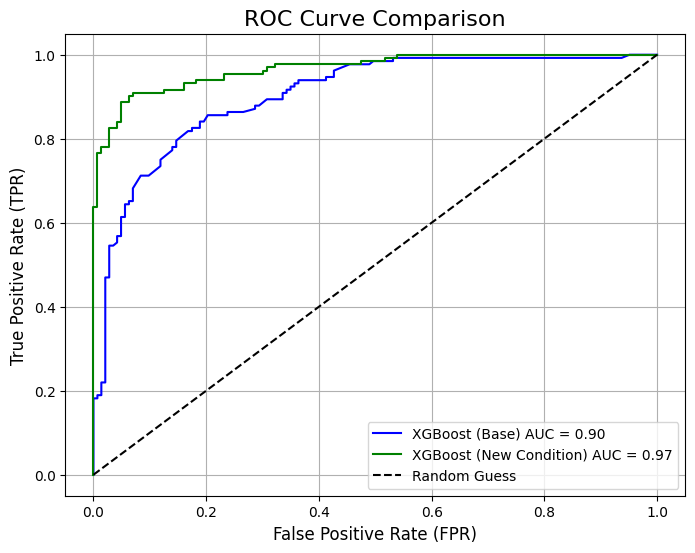

In [ ]:
# 새로운 XGBoost 조건 (예: learning_rate와 max_depth 변경)
new_xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                              learning_rate=0.1, max_depth=6, random_state=42)
new_xgb_model.fit(X_train, y_train)
new_xgb_pred_prob = new_xgb_model.predict_proba(X_test)[:, 1]

# ROC Curve 계산
new_xgb_fpr, new_xgb_tpr, _ = roc_curve(y_test, new_xgb_pred_prob)
new_xgb_auc = auc(new_xgb_fpr, new_xgb_tpr)

# 기존 그래프에 추가
plt.figure(figsize=(8, 6))
plt.plot(xgb_fpr, xgb_tpr, label=f"XGBoost (Base) AUC = {xgb_auc:.2f}", color="blue")
plt.plot(new_xgb_fpr, new_xgb_tpr, label=f"XGBoost (New Condition) AUC = {new_xgb_auc:.2f}", color="green")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

# 그래프 꾸미기
plt.title("ROC Curve Comparison", fontsize=16)
plt.xlabel("False Positive Rate (FPR)", fontsize=12)
plt.ylabel("True Positive Rate (TPR)", fontsize=12)
plt.legend(loc="lower right")
plt.grid()
plt.show()